In [31]:
import warnings

warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [32]:
%matplotlib inline

In [33]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [34]:
from zipfile import ZipFile

directory_18 = r"F:\Ecobee\files\2018_sac"
df_sac_18_hourly_24h = pd.DataFrame()
import datetime

for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=["DateTime"])
    df_temp1 = pd.get_dummies(df_temp, columns=["HvacMode"])
    df_temp1["Date"] = df_temp1["DateTime"].dt.date
    df_temp1["HourOfDay"] = df_temp1["DateTime"].dt.hour
    df_temp1["user_id"] = filename[:-8]
    df_temp1 = df_temp1[
        (df_temp1["DateTime"].dt.month >= 6) & (df_temp1["DateTime"].dt.month <= 9)
    ]  # summer days only

    df_day = (
        df_temp1.groupby(["Date", "HourOfDay"])
        .agg(
            hourly_total_cooling=pd.NamedAgg(column="compCool1", aggfunc=sum),
            user_id=pd.NamedAgg(column="user_id", aggfunc=min),
        )
        .reset_index()
    )
    df_day['hourly_total_cooling'] = df_day['hourly_total_cooling'] / 3600
    df_sac_18_hourly_24h = pd.concat([df_sac_18_hourly_24h, df_day])
    g.close()
    myzip.close()

In [35]:
df_sac_18_hourly_24h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508723 entries, 0 to 2927
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  508723 non-null  object 
 1   HourOfDay             508723 non-null  int64  
 2   hourly_total_cooling  508723 non-null  float64
 3   user_id               508723 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 19.4+ MB


In [36]:
df_sac_18_hourly_24h.head()

,Date,HourOfDay,hourly_total_cooling,user_id
0,2018-06-01,0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2018-06-01,1,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2018-06-01,2,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2018-06-01,3,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2018-06-01,4,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [37]:
# pd.set_option("display.max_rows", None)
# # remove user_ids that have no cooling consumption at all for 2018
# df_18_temp = (
#     df_sac_18_daily_24h[["user_id", "daily_total_cooling"]]
#     .groupby("user_id")
#     .max()
#     .reset_index()
# )
# df_18_temp["any_usage"] = df_18_temp.daily_total_cooling > 0
# df_18_temp = df_18_temp["user_id"][df_18_temp["any_usage"] == True]
# df_sac_18_daily_24h = pd.merge(
#     df_18_temp, df_sac_18_daily_24h, how="left", on="user_id"
# )

In [38]:
# df_sac_18_daily_24h.head()

In [39]:
from zipfile import ZipFile

df_sac_19_hourly_24h = pd.DataFrame()
directory_19 = r"F:\Ecobee\files\2019_sac"
import datetime

for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=["DateTime"])
    df_temp1 = pd.get_dummies(df_temp, columns=["HvacMode"])
    df_temp1["Date"] = df_temp1["DateTime"].dt.date
    df_temp1["HourOfDay"] = df_temp1["DateTime"].dt.hour
    df_temp1["user_id"] = filename[:-8]
    df_temp1 = df_temp1[
        (df_temp1["DateTime"].dt.month >= 6) & (df_temp1["DateTime"].dt.month <= 9)
    ]  # summer days only
    df_day = (
        df_temp1.groupby(["Date", "HourOfDay"])
        .agg(
            hourly_total_cooling=pd.NamedAgg(column="compCool1", aggfunc=sum),
            user_id=pd.NamedAgg(column="user_id", aggfunc=min),
        )
        .reset_index()
    )
    df_day["hourly_total_cooling"] = df_day["hourly_total_cooling"] / 3600
    df_sac_19_hourly_24h = pd.concat([df_sac_19_hourly_24h, df_day])
    f.close()
    myzip.close()

In [40]:
df_sac_19_hourly_24h.head()
#note there is a "time jump" from 2019-07-25 16:55 to 2019-07-26 17:00

,Date,HourOfDay,hourly_total_cooling,user_id
0,2019-06-01,0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-01,1,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-01,2,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-01,3,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-01,4,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [41]:
# pd.set_option('display.max_rows', None)
# #remove user_ids that have no cooling consumption at all for 2019
# df_19_temp=df_sac_19_daily_24h[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
# df_19_temp['any_usage']=(df_19_temp.daily_total_cooling>0)
# df_19_temp=df_19_temp['user_id'][df_19_temp['any_usage']==True]
# df_sac_19_daily_24h=pd.merge(df_19_temp,df_sac_19_daily_24h,how='left', on='user_id')

In [42]:
# df_sac_19_hourly_24h.head()

In [43]:
df_sac_18n19_hourly_24h=pd.concat([df_sac_18_hourly_24h,df_sac_19_hourly_24h])
df_sac_18n19_hourly_24h.head()

,Date,HourOfDay,hourly_total_cooling,user_id
0,2018-06-01,0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2018-06-01,1,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2018-06-01,2,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2018-06-01,3,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2018-06-01,4,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [44]:
df_sac_18n19_hourly_24h['count'] = df_sac_18n19_hourly_24h.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_hourly_24h['count'].value_counts().head(10)

5832    682344
2904    467544
5784     40488
5808     34848
5335     26675
5736     11472
5239     10478
2856      8568
2832      8496
2928      5856
Name: count, dtype: int64

In [45]:
df_sac_18n19_hourly_24h=df_sac_18n19_hourly_24h[df_sac_18n19_hourly_24h['count']==5832]
df_sac_18n19_hourly_24h['Date']=pd.to_datetime(df_sac_18n19_hourly_24h['Date'])
df_sac_18n19_hourly_24h.head()

,Date,HourOfDay,hourly_total_cooling,user_id,count
0,2018-06-01,0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,5832
1,2018-06-01,1,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,5832
2,2018-06-01,2,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,5832
3,2018-06-01,3,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,5832
4,2018-06-01,4,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,5832


In [46]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [47]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [48]:
df_sac_18n19_hourly_24h_w_temperature=pd.merge(df_sac_18n19_hourly_24h,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_hourly_24h_w_temperature.head()

,Date,HourOfDay,hourly_total_cooling,user_id,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,2018-06-01,0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,5832,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,2018-06-01,1,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,5832,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
2,2018-06-01,2,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,5832,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
3,2018-06-01,3,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,5832,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
4,2018-06-01,4,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,5832,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49


In [49]:
df_sac_18n19_hourly_24h_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_hourly_24h_w_temperature['TAVG'] - 62
df_sac_18n19_hourly_24h_w_temperature['TAVG_less_62'] = df_sac_18n19_hourly_24h_w_temperature['TAVG_less_62'].apply(lambda x : x if x > 0 else 0)

In [50]:
df_sac_18n19_hourly_24h_w_temperature['y2019']=np.where(df_sac_18n19_hourly_24h_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_hourly_24h_w_temperature['Date'].dt.year==2019]
df_sac_18n19_hourly_24h_w_temperature.describe()

,HourOfDay,hourly_total_cooling,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019
count,682344.000000,682344.000000,682344.0,682344.000000,682344.000000,682344.000000,682344.000000,682344.000000
mean,11.500000,0.134522,5832.0,72.715364,90.364369,58.484911,10.752401,0.497942
std,6.922192,0.252039,0.0,5.181476,7.231845,3.996672,5.090853,0.499996
min,0.000000,0.000000,5832.0,58.000000,69.000000,45.000000,0.000000,0.000000
25%,5.750000,0.000000,5832.0,69.000000,86.000000,56.000000,7.000000,0.000000
50%,11.500000,0.000000,5832.0,73.000000,91.000000,58.000000,11.000000,0.000000
75%,17.250000,0.175000,5832.0,76.000000,96.000000,61.000000,14.000000,1.000000
max,23.000000,1.000000,5832.0,86.000000,105.000000,69.000000,24.000000,1.000000


In [51]:
df_sac_18n19_hourly_24h_w_temperature[
    'interaction'] = df_sac_18n19_hourly_24h_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_hourly_24h_w_temperature['y2019']

In [52]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


# #This is what you need
# results=df_sac_18n19_hourly_24h_w_temperature.groupby('user_id').apply(
#     regress, 'hourly_total_cooling', ['TAVG_less_62','interaction']).reset_index()
# results.head(10)

In [53]:
# # x axis range
# x = range(len(results))
# plt.figure(figsize=(15,10))
# # y2
# plt.plot(x,results['TAVG_less_62'],label='coeff:TAVG_less_62')
# # y2
# plt.plot(x,results['interaction'],label='coeff:interaction')
# # y=0 line 
# plt.plot(x,[0] * len(results))
# plt.legend(loc="upper left")

In [54]:
# print(results[results.interaction > 0.01].count())
# print(results[results.interaction < -0.01].count())

In [55]:
# print(results['interaction'][results.interaction > 0.01].sum())
# print(results['interaction'][results.interaction < -0.01].sum())
# # the sum of negative interaction coefficients has a larger scale

In [56]:
df_sac_18n19_hourly_24h_w_temperature['const']=1
list_1=list(['df_hour_']*24)
list_2_int=list(range(24))
list_2_str = [str(int) for int in list_2_int] 
list_3 = [i + j for i, j in zip(list_1, list_2_str)]
# print(list_3)
for i in range(24):
    globals()['df_hour_+str(i)'] = list_3[i]
#     print(globals()['df_hour_+str(i)'])
list_1=list(['reg_result_']*24)
# list_2_int=list(range(24))
# list_2_str = [str(int) for int in list_2_int] 
list_3 = [i + j for i, j in zip(list_1, list_2_str)]
for i in range(24):
    globals()['reg_result+str(i)'] = list_3[i]
#     print(globals()['reg_result+str(i)'])
list_of_results=[]
for h in range(24):    
    reg_data=df_sac_18n19_hourly_24h_w_temperature[df_sac_18n19_hourly_24h_w_temperature['HourOfDay']==h]
    globals()['df_hour_+str(h)']  = sm.OLS(endog=reg_data['hourly_total_cooling'], \
              exog=reg_data[['TAVG_less_62','interaction','const']], \
                missing='drop')
    globals()['reg_result+str(i)'] =  globals()['df_hour_+str(h)'].fit(cov_type='HC1')
#     print('Results for hour *******************'+str(h)+'*******************')
#     print('\n')
#     print(globals()['reg_result+str(i)'].summary())
    list_of_results.append(globals()['reg_result+str(i)'])

In [57]:
interaction_coeffs = []
for i in range(24):
    interaction_coeffs.append(list_of_results[i].params[1])

print(interaction_coeffs)
interaction_coeff_se = []
for i in range(24):
    interaction_coeff_se.append(list_of_results[i].bse[1])
print(interaction_coeff_se)
interaction_coeffs_plusSE = [
    a + b for a, b in zip(interaction_coeffs, interaction_coeff_se)
]
print(interaction_coeffs_plusSE)
interaction_coeffs_minusSE = [
    a - b for a, b in zip(interaction_coeffs, interaction_coeff_se)
]
print(interaction_coeffs_minusSE)

[0.0011056826912094913, 0.0009526656481013153, 0.0009349291929541486, 0.0006790960753250586, 0.0008165016595704422, 0.000590526860935044, 0.00015502200234920356, 0.0004803749293413763, 0.00039552309288217564, 0.0004600179907510641, 0.0003591668090492853, 0.0004077078208328872, -0.0002844292137354051, -0.00022975422623663878, -0.0001867803964508517, -3.6296303597697064e-05, 0.0003059911130164659, -0.003221236284439998, -0.003199081769774563, -0.0018934536673501775, 0.00207283278641343, -0.00014968272939066464, 0.0006603444534295675, 0.0008602213371109847]
[0.00019815003253156134, 0.00016588464276784078, 0.00013785441910417674, 0.00011882193271744399, 0.00010669666542124093, 9.936678615134901e-05, 9.405581927850517e-05, 9.626696812548153e-05, 0.0001106744762575591, 0.0001421979237215133, 0.00017572459471158246, 0.00021116802564227942, 0.000245221490553454, 0.0002887218257512146, 0.0003199556704258033, 0.0003462915882293057, 0.0003629926317415328, 0.0003666976727246793, 0.0003559353987221

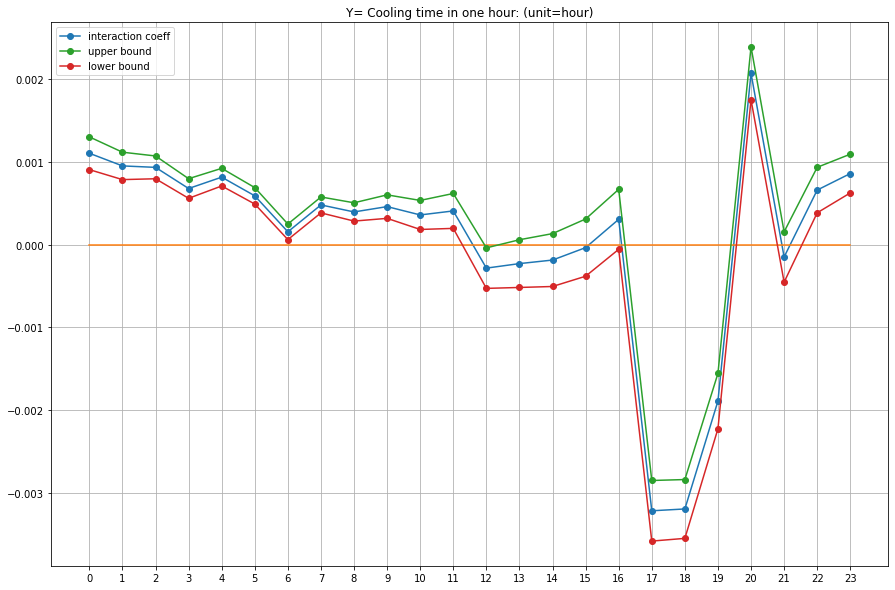

In [58]:
# x axis range
x = range(len(interaction_coeffs))
plt.figure(figsize=(15,10))
# y
plt.plot(x,interaction_coeffs,'o-', label='interaction coeff')
plt.plot(x,[0] * len(interaction_coeffs))
plt.plot(x,interaction_coeffs_plusSE,'o-', label='upper bound')
plt.plot(x,interaction_coeffs_minusSE,'o-', label='lower bound')
plt.legend(loc="upper left")
plt.xticks(x)
plt.grid()
plt.title("Y= Cooling time in one hour: (unit=hour)")
plt.show()

In [59]:
df_sac_18n19_hourly_24h.user_id.nunique()

117

# y=(on/off)

In [64]:
# pd.set_option('display.max_rows', None)
# generate a new column indicating on/off of cooling AC
df_sac_18n19_hourly_24h_w_temperature['AC_cooling_on']=np.where(df_sac_18n19_hourly_24h_w_temperature['hourly_total_cooling']> 0, 1, 0)

# df_19_temp=df_sac_19_daily_24h[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
# df_19_temp['any_usage']=(df_19_temp.daily_total_cooling>0)
# df_19_temp=df_19_temp['user_id'][df_19_temp['any_usage']==True]
# df_sac_19_daily_24h=pd.merge(df_19_temp,df_sac_19_daily_24h,how='left', on='user_id')
df_sac_18n19_hourly_24h_w_temperature.describe()

,HourOfDay,hourly_total_cooling,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019,interaction,const,AC_cooling_on
count,682344.000000,682344.000000,682344.0,682344.000000,682344.000000,682344.000000,682344.000000,682344.000000,682344.000000,682344.0,682344.000000
mean,11.500000,0.134522,5832.0,72.715364,90.364369,58.484911,10.752401,0.497942,5.748285,1.0,0.323051
std,6.922192,0.252039,0.0,5.181476,7.231845,3.996672,5.090853,0.499996,6.820636,0.0,0.467642
min,0.000000,0.000000,5832.0,58.000000,69.000000,45.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,5.750000,0.000000,5832.0,69.000000,86.000000,56.000000,7.000000,0.000000,0.000000,1.0,0.000000
50%,11.500000,0.000000,5832.0,73.000000,91.000000,58.000000,11.000000,0.000000,0.000000,1.0,0.000000
75%,17.250000,0.175000,5832.0,76.000000,96.000000,61.000000,14.000000,1.000000,12.000000,1.0,1.000000
max,23.000000,1.000000,5832.0,86.000000,105.000000,69.000000,24.000000,1.000000,24.000000,1.0,1.000000


In [65]:
df_sac_18n19_hourly_24h_w_temperature['const']=1
list_1=list(['df_hour_onoff_']*24)
list_2_int=list(range(24))
list_2_str = [str(int) for int in list_2_int] 
list_3 = [i + j for i, j in zip(list_1, list_2_str)]
# print(list_3)
for i in range(24):
    globals()['df_hour_onoff_+str(i)'] = list_3[i]
#     print(globals()['df_hour_onoff_+str(i)'])
list_1=list(['reg_result_onoff_']*24)
# list_2_int=list(range(24))
# list_2_str = [str(int) for int in list_2_int] 
list_3 = [i + j for i, j in zip(list_1, list_2_str)]
for i in range(24):
    globals()['reg_result_onoff_+str(i)'] = list_3[i]
#     print(globals()['reg_result_onoff_+str(i)'])
list_of_results_onoff=[]
for h in range(24):    
    reg_data=df_sac_18n19_hourly_24h_w_temperature[df_sac_18n19_hourly_24h_w_temperature['HourOfDay']==h]
    globals()['df_hour_onoff_+str(h)']  = sm.OLS(endog=reg_data['AC_cooling_on'], \
              exog=reg_data[['TAVG_less_62','interaction','const']], \
                missing='drop')
    globals()['reg_result_onoff_+str(i)'] =  globals()['df_hour_onoff_+str(h)'].fit(cov_type='HC1')
#     print('Results (on/off) for hour *******************'+str(h)+'*******************')
#     print('\n')
#     print(globals()['reg_result_onoff_+str(i)'].summary())
    list_of_results_onoff.append(globals()['reg_result_onoff_+str(i)'])

In [66]:
interaction_coeffs_onoff = []
for i in range(24):
    interaction_coeffs_onoff.append(list_of_results_onoff[i].params[1])

print(interaction_coeffs_onoff)
interaction_coeff_se_onoff = []
for i in range(24):
    interaction_coeff_se_onoff.append(list_of_results[i].bse[1])
print(interaction_coeff_se_onoff)
interaction_coeffs_plusSE_onoff = [
    a + b for a, b in zip(interaction_coeffs_onoff, interaction_coeff_se_onoff)
]
print(interaction_coeffs_plusSE_onoff)
interaction_coeffs_minusSE_onoff = [
    a - b for a, b in zip(interaction_coeffs_onoff, interaction_coeff_se_onoff)
]
print(interaction_coeffs_minusSE_onoff)

[0.0009253270018094482, 0.0010341948858117226, 0.0011518105251065588, 0.0015920321257823574, 0.0021220863363078666, 0.0016085323969530524, 0.0012934372715758518, 0.0021721890618574434, 0.0016432416314057213, 0.000808894214375345, 0.001363227711590814, 0.0011663101093783096, -0.0009072032008977563, -0.001727377023780814, -0.0014579045710506819, -0.0006293102978462479, -0.0002486935856693373, -0.005493795616239928, -0.004570885670049521, -0.0009549850465931489, -0.002147568973330816, -0.0035992712791118207, -0.0019381538119070925, -0.000626014442757227]
[0.00019815003253156134, 0.00016588464276784078, 0.00013785441910417674, 0.00011882193271744399, 0.00010669666542124093, 9.936678615134901e-05, 9.405581927850517e-05, 9.626696812548153e-05, 0.0001106744762575591, 0.0001421979237215133, 0.00017572459471158246, 0.00021116802564227942, 0.000245221490553454, 0.0002887218257512146, 0.0003199556704258033, 0.0003462915882293057, 0.0003629926317415328, 0.0003666976727246793, 0.0003559353987221094

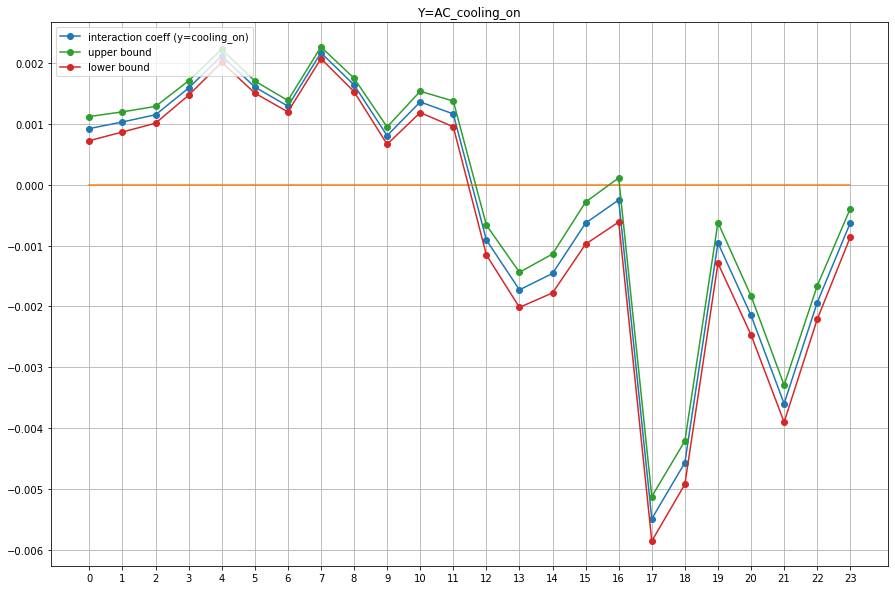

In [67]:
# x axis range
x = range(len(interaction_coeffs_onoff))
plt.figure(figsize=(15,10))
# y
plt.plot(x,interaction_coeffs_onoff,'o-', label='interaction coeff (y=cooling_on)')
plt.plot(x,[0] * len(interaction_coeffs))
plt.plot(x,interaction_coeffs_plusSE_onoff,'o-', label='upper bound')
plt.plot(x,interaction_coeffs_minusSE_onoff,'o-', label='lower bound')
plt.legend(loc="upper left")
plt.xticks(x)
plt.grid()
plt.title("Y=AC_cooling_on")
plt.show()

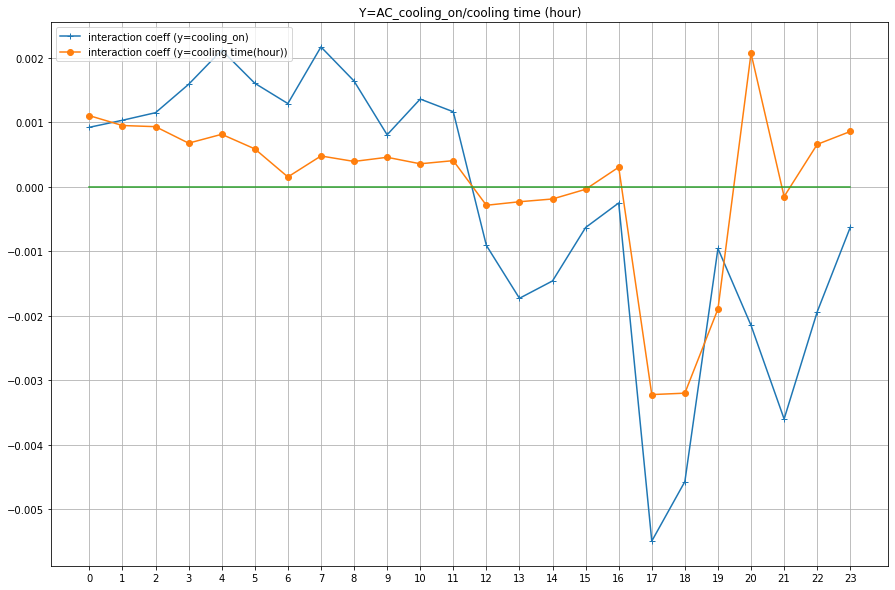

In [68]:
# x axis range
x = range(len(interaction_coeffs_onoff))
plt.figure(figsize=(15,10))
# y
plt.plot(x,interaction_coeffs_onoff,'+-', label='interaction coeff (y=cooling_on)')
plt.plot(x,interaction_coeffs,'o-', label='interaction coeff (y=cooling time(hour))')
plt.plot(x,[0] * len(interaction_coeffs))
plt.legend(loc="upper left")
plt.xticks(x)
plt.grid()
plt.title("Y=AC_cooling_on/cooling time (hour)")
plt.show()

TOU pricing REDUCED the probability of "turning cooling on" in peak/mid-peak hours.